1.1

In [26]:
import pandas as pd

df = pd.read_csv('problem1.csv')

mean_p1 = df.mean(numeric_only=True)
print("mean: ")
print(mean_p1)
variance_p1 = df.var(numeric_only=True)
print("Variance: ")
print(variance_p1)
skewness_p1 = df.skew(numeric_only=True)
print("Skewness: ")
print(skewness_p1)
kurtosis_p1 = df.kurt(numeric_only=True)
print("Kurtosis: ")
print(kurtosis_p1)

mean: 
X    0.050198
dtype: float64
Variance: 
X    0.010332
dtype: float64
Skewness: 
X    0.120626
dtype: float64
Kurtosis: 
X    0.23007
dtype: float64


1.2 I would like to choose Normal-distribution, since sample size is > 30

In [28]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t

# 读取数据
data = df.select_dtypes(include=[np.number]).dropna().values.flatten()

# 拟合正态分布
mu_norm, sigma_norm = norm.fit(data)
log_likelihood_norm = np.sum(np.log(norm.pdf(data, mu_norm, sigma_norm)))

# 拟合 t 分布
df_t, loc_t, scale_t = t.fit(data)
log_likelihood_t = np.sum(np.log(t.pdf(data, df_t, loc_t, scale_t)))

# 计算 AICc
def aicc(log_likelihood, k, n):
    return (2 * k - 2 * log_likelihood) + (2 * k * (k + 1)) / (n - k - 1)

n_samples = len(data)
aicc_norm = aicc(log_likelihood_norm, 2, n_samples)  # 正态分布有2个参数
aicc_t = aicc(log_likelihood_t, 3, n_samples)        # t 分布有3个参数

# 输出结果
print("AICc Comparison:")
print(f"正态分布 (Normal) AICc: {aicc_norm}")
print(f"t 分布 (T-Distribution) AICc: {aicc_t}")


AICc Comparison:
正态分布 (Normal) AICc: -1731.574692728183
t 分布 (T-Distribution) AICc: -1731.394272534012


In [35]:
import numpy as np
import pandas as pd
from scipy.linalg import eigh
from sklearn.covariance import EmpiricalCovariance

# 读取数据
df = pd.read_csv('problem2.csv')

# A. 计算数据的协方差矩阵
cov_matrix = df.cov()
print("A. Pairwise Covariance Matrix:\n", cov_matrix)

# B. 检查矩阵是否为半正定
eigvals = np.linalg.eigvalsh(cov_matrix)
print(eigvals)
is_psd = np.all(eigvals >= 0)
print(f"B. Is the matrix at least positive semi-definite? {is_psd}")

# C. 如果不是，计算最近的半正定矩阵
def nearest_psd_higham(A, tol=1e-8):
    """使用 Higham 方法找到最近的半正定矩阵"""
    eigvals, eigvecs = np.linalg.eigh(A)
    eigvals = np.maximum(eigvals, tol)
    return eigvecs @ np.diag(eigvals) @ eigvecs.T

def nearest_psd_rebenato(A):
    """使用 Rebenato 和 Jackel 的方法找到最近的半正定矩阵"""
    X = A.copy()
    eigvals, eigvecs = np.linalg.eigh(X)
    X_psd = eigvecs @ np.diag(np.maximum(eigvals, 0)) @ eigvecs.T
    return X_psd

cov_matrix_higham = nearest_psd_higham(cov_matrix)
cov_matrix_rebenato = nearest_psd_rebenato(cov_matrix)

print("C. Nearest PSD Matrix (Higham Method):\n", cov_matrix_higham)
print("C. Nearest PSD Matrix (Rebenato & Jackel Method):\n", cov_matrix_rebenato)

# D. 仅使用重叠数据计算协方差矩阵
overlapping_cov_matrix = df.dropna().cov()
print("D. Covariance Matrix Using Only Overlapping Data:\n", overlapping_cov_matrix)

# E. 比较 C 和 D 的结果
# 计算两个矩阵相减后的差异矩阵
diff_higham_matrix = pd.DataFrame(cov_matrix_higham - overlapping_cov_matrix.values, 
                                  index=overlapping_cov_matrix.index, 
                                  columns=overlapping_cov_matrix.columns)

diff_rebonato_matrix = pd.DataFrame(cov_matrix_rebenato - overlapping_cov_matrix.values, 
                                    index=overlapping_cov_matrix.index, 
                                    columns=overlapping_cov_matrix.columns)

# 输出差异矩阵
print("\nE. Difference Matrix (Higham - Overlapping Data):\n", diff_higham_matrix)
print("\nE. Difference Matrix (Rebonato - Overlapping Data):\n", diff_rebonato_matrix)





A. Pairwise Covariance Matrix:
           x1        x2        x3        x4        x5
x1  1.470484  1.454214  0.877269  1.903226  1.444361
x2  1.454214  1.252078  0.539548  1.621918  1.237877
x3  0.877269  0.539548  1.272425  1.171959  1.091912
x4  1.903226  1.621918  1.171959  1.814469  1.589729
x5  1.444361  1.237877  1.091912  1.589729  1.396186
[-0.31024286 -0.13323183  0.02797828  0.83443367  6.78670573]
B. Is the matrix at least positive semi-definite? False
C. Nearest PSD Matrix (Higham Method):
 [[1.61513295 1.44196041 0.89714421 1.78042572 1.43379434]
 [1.44196041 1.34696791 0.58508636 1.55455192 1.21140918]
 [0.89714421 0.58508636 1.29891579 1.11595578 1.07669233]
 [1.78042572 1.55455192 1.11595578 1.98316489 1.62137332]
 [1.43379434 1.21140918 1.07669233 1.62137332 1.40493616]]
C. Nearest PSD Matrix (Rebenato & Jackel Method):
 [[1.61513295 1.44196041 0.89714421 1.78042572 1.43379434]
 [1.44196041 1.34696791 0.58508635 1.55455193 1.21140918]
 [0.89714421 0.58508635 1.29891578

===== A. Mean Vector and Covariance Matrix =====
Mean Vector:
x1    0.046002
x2    0.099915
dtype: float64

Covariance Matrix:
          x1        x2
x1  0.010162  0.004924
x2  0.004924  0.020284
Sample Mean: 0.3687
Sample Variance: 0.0180


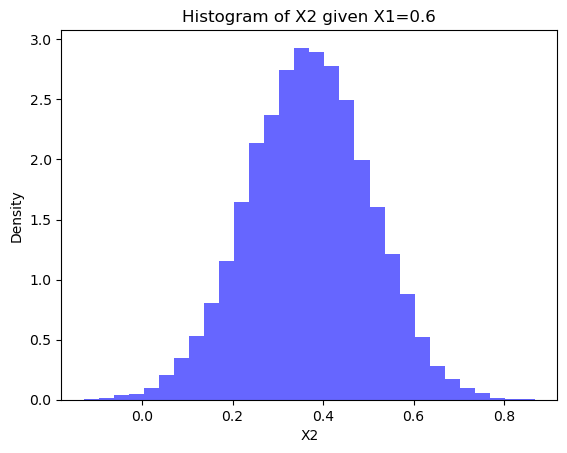

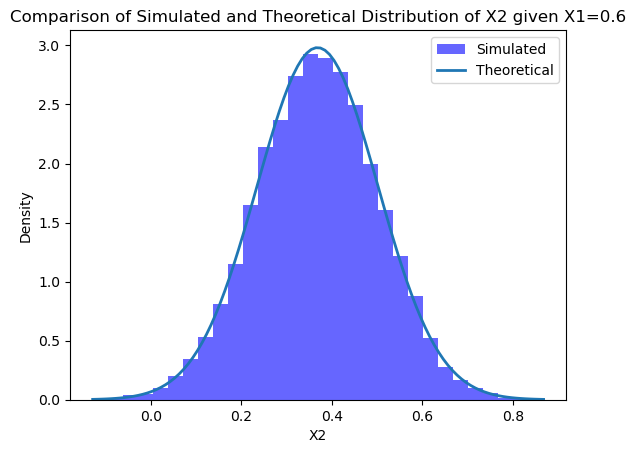

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data
file_path = "problem3.csv"
df = pd.read_csv(file_path)

# Set random seed for reproducibility
np.random.seed(42)

# A. Calculate Mean Vector and Covariance Matrix
mu = df.mean()  # Mean Series
cov_matrix = df.cov()  # Covariance Matrix DataFrame

# Output results for Part A
print("===== A. Mean Vector and Covariance Matrix =====")
print("Mean Vector:")
print(mu)
print("\nCovariance Matrix:")
print(cov_matrix)

# B. Calculate the Conditional Mean and Variance of X2 | X1=0.6
x1_given = 0.6
sigma_x1x1 = cov_matrix.loc["x1", "x1"]
sigma_x2x2 = cov_matrix.loc["x2", "x2"]
sigma_x1x2 = cov_matrix.loc["x1", "x2"]

# Method 1: Conditional Mean and Variance (Formula-based)
conditional_mean_x2 = mu["x2"] + (sigma_x1x2 / sigma_x1x1) * (x1_given - mu["x1"])
conditional_var_x2 = sigma_x2x2 - (sigma_x1x2**2 / sigma_x1x1)

# Method 2: Linear Regression
X1 = df[["x1"]].values
X2 = df["x2"].values

reg = LinearRegression().fit(X1, X2)
predicted_mean_x2 = reg.predict([[x1_given]])[0]
residuals = X2 - reg.predict(X1)
predicted_var_x2 = np.var(residuals)

# C. Simulation to prove the distribution of X2 | X1=0.6 is correct
from scipy.stats import multivariate_normal

# Cholesky decomposition
L = np.linalg.cholesky(cov_matrix)

# Parameters
x1_given = 0.6
mean_x1 = mu["x1"]
mean_x2 = mu["x2"]
var_x1 = cov_matrix.loc["x1", "x1"]
var_x2 = cov_matrix.loc["x2", "x2"]
cov_x1x2 = cov_matrix.loc["x1", "x2"]

# Standardized value for X1
z1 = (x1_given - mean_x1) / np.sqrt(var_x1)

# Generate conditional samples for X2
n_samples = 10000
np.random.seed(33)
Z2 = np.random.normal(0, 1, n_samples)
X2 = mean_x2 + L[1, 0] * z1 + L[1, 1] * Z2

# Conditional distribution parameters
mean_x2_given_x1 = mean_x2 + (cov_x1x2 / var_x1) * (x1_given - mean_x1)
var_x2_given_x1 = var_x2 - (cov_x1x2 ** 2) / var_x1

# Output simulated mean and variance
print(f"Sample Mean: {np.mean(X2):.4f}")
print(f"Sample Variance: {np.var(X2):.4f}")

# Plot the histogram of the conditional samples
plt.hist(X2, bins=30, density=True, alpha=0.6, color='b')
plt.title(f"Histogram of X2 given X1={x1_given}")
plt.xlabel("X2")
plt.ylabel("Density")
plt.show()

# Compare simulated distribution with theoretical distribution
x2_values = np.linspace(min(X2), max(X2), 100)
conditional_pdf = multivariate_normal.pdf(x2_values, mean=mean_x2_given_x1, cov=var_x2_given_x1)

plt.hist(X2, bins=30, density=True, alpha=0.6, color='b', label='Simulated')
plt.plot(x2_values, conditional_pdf, '-', lw=2, label='Theoretical')
plt.title(f"Comparison of Simulated and Theoretical Distribution of X2 given X1={x1_given}")
plt.xlabel("X2")
plt.ylabel("Density")
plt.legend()
plt.show()



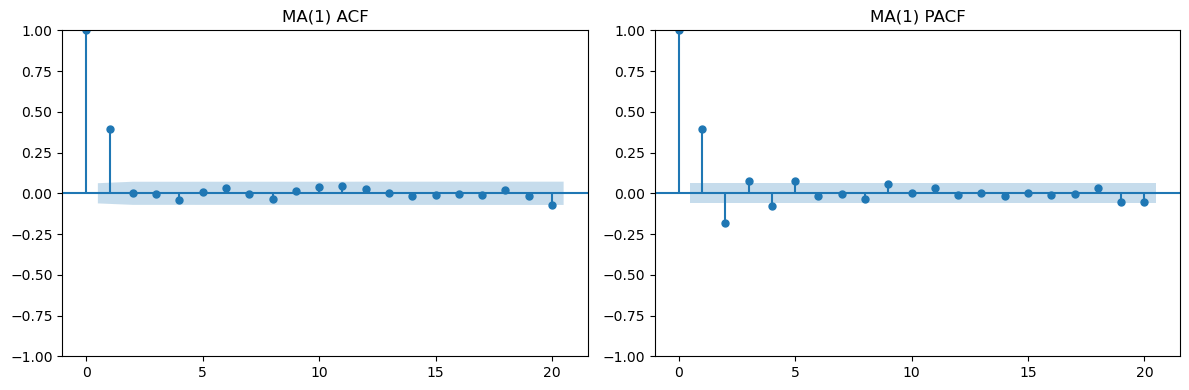

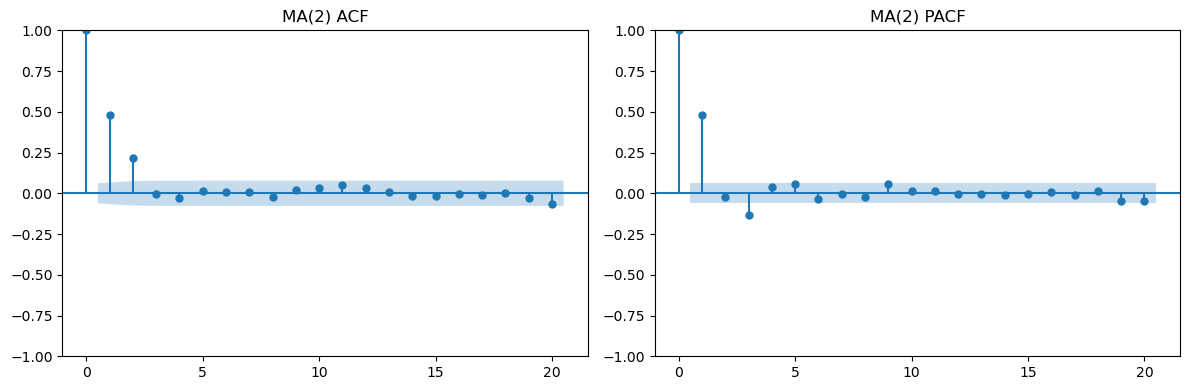

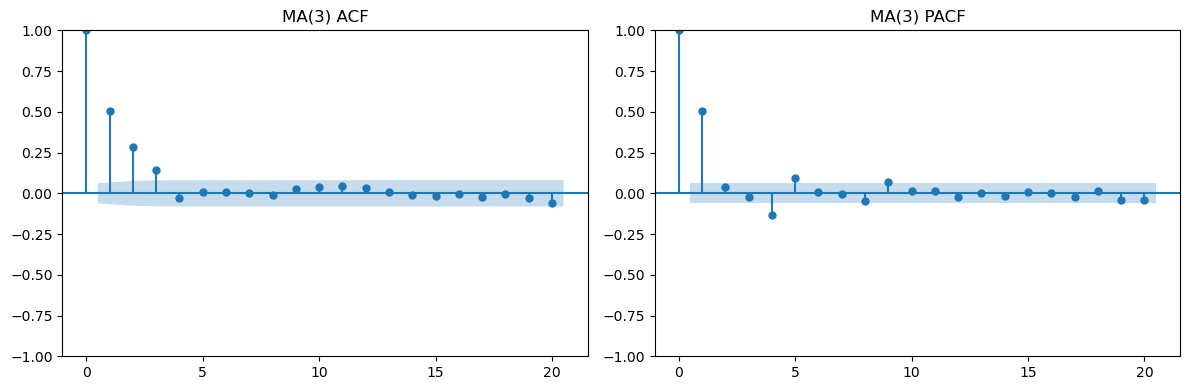

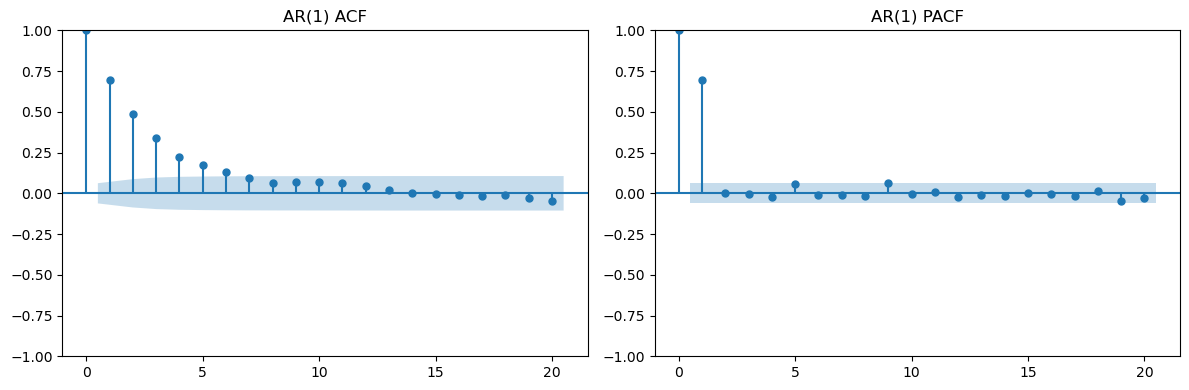

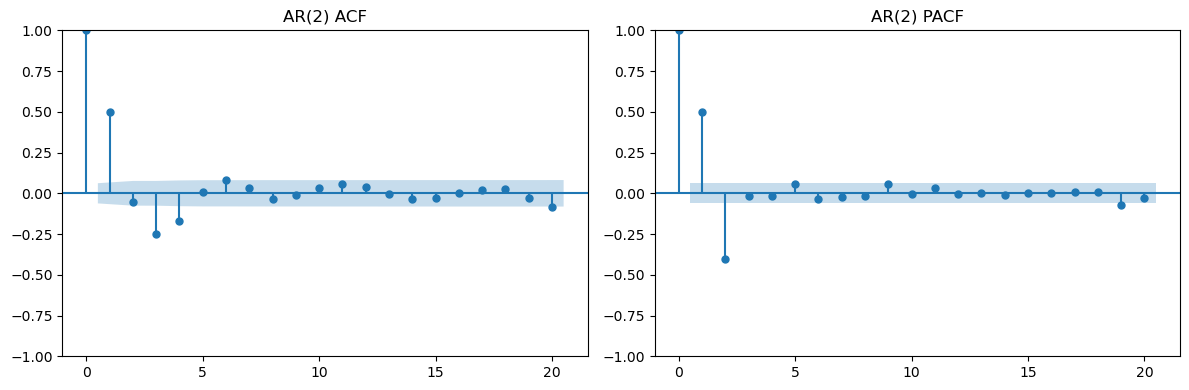

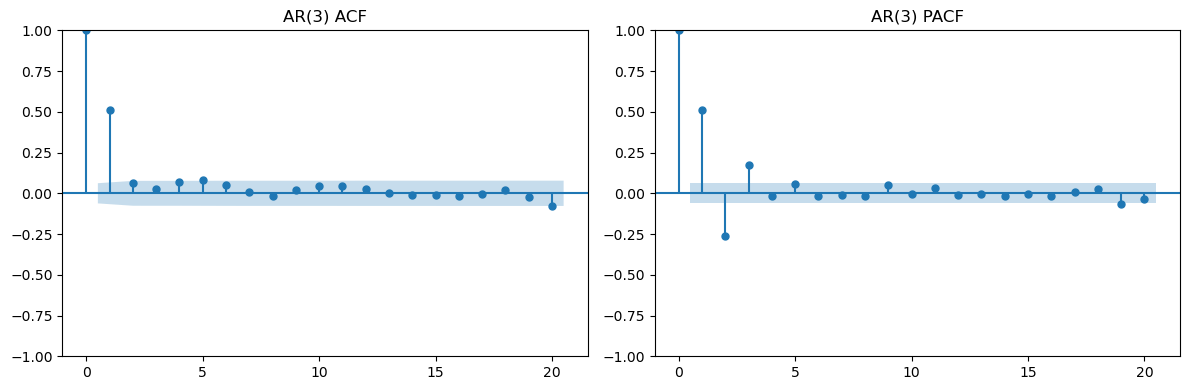

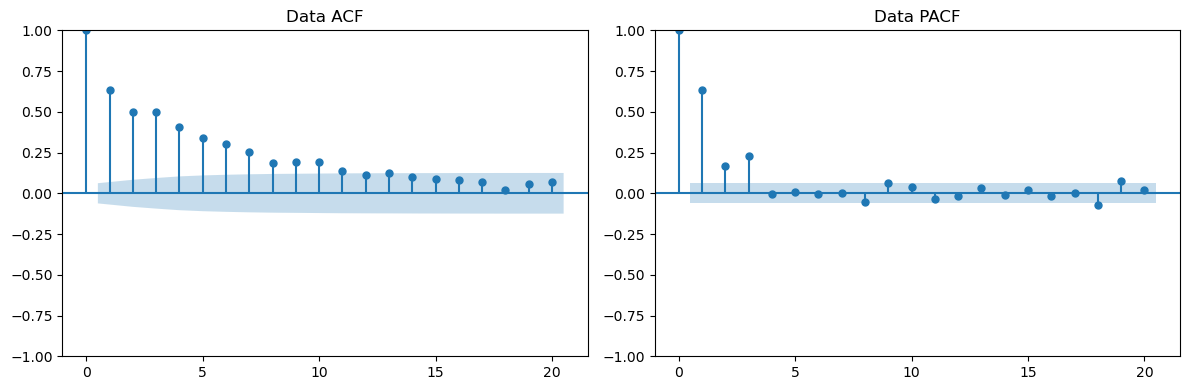

   Model          AIC         AICc
2  AR(3) -1746.281721 -1746.221359
1  AR(2) -1696.091685 -1696.051484
0  AR(1) -1669.089267 -1669.065171
5  MA(3) -1645.132969 -1645.072607
4  MA(2) -1559.250932 -1559.210731
3  MA(1) -1508.927033 -1508.902937


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import norm, multivariate_normal

# Load the data
file_path = "problem4.csv"
data = pd.read_csv(file_path)

# Extract the time series
ts = data.iloc[:, 0]  # Assuming the first column contains the time series

# Function to simulate AR and MA processes
def simulate_and_plot(process_type, params, lags=20):
    np.random.seed(42)
    n_samples = 1000
    
    if process_type == 'MA':
        ma = np.r_[1, params]  # Include lag 0
        ar = np.array([1])
    elif process_type == 'AR':
        ar = np.r_[1, -np.array(params)]  # Include lag 0 and flip sign
        ma = np.array([1])
    else:
        raise ValueError("Invalid process type. Use 'AR' or 'MA'.")

    arma_process = ArmaProcess(ar, ma)
    simulated_data = arma_process.generate_sample(nsample=n_samples)

    # Plotting ACF and PACF
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    plot_acf(simulated_data, lags=lags, ax=axes[0])
    plot_pacf(simulated_data, lags=lags, ax=axes[1])
    axes[0].set_title(f"{process_type}({len(params)}) ACF")
    axes[1].set_title(f"{process_type}({len(params)}) PACF")
    plt.tight_layout()
    plt.show()

# A. Simulate MA(1), MA(2), MA(3)
simulate_and_plot('MA', [0.5])       # MA(1)
simulate_and_plot('MA', [0.5, 0.3])  # MA(2)
simulate_and_plot('MA', [0.5, 0.3, 0.2])  # MA(3)

# B. Simulate AR(1), AR(2), AR(3)
simulate_and_plot('AR', [0.7])       # AR(1)
simulate_and_plot('AR', [0.7, -0.4]) # AR(2)
simulate_and_plot('AR', [0.7, -0.4, 0.2]) # AR(3)

# C. Analyze the data from problem4.csv
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(ts, lags=20, ax=axes[0])
plot_pacf(ts, lags=20, ax=axes[1])
axes[0].set_title("Data ACF")
axes[1].set_title("Data PACF")
plt.tight_layout()
plt.show()

# D. Fit AR/MA models and compare AICc
models = {'AR(1)': (1,0,0), 'AR(2)': (2,0,0), 'AR(3)': (3,0,0), 'MA(1)': (0,0,1), 'MA(2)': (0,0,2), 'MA(3)': (0,0,3)}
results = []

n = len(ts)

for name, order in models.items():
    model = ARIMA(ts, order=order)
    fit = model.fit()
    k = fit.df_model
    aic = fit.aic
    aicc = aic + (2 * k * (k + 1)) / (n - k - 1)
    results.append({'Model': name, 'AIC': aic, 'AICc': aicc})

# Display results
results_df = pd.DataFrame(results).sort_values(by='AICc')
print(results_df)


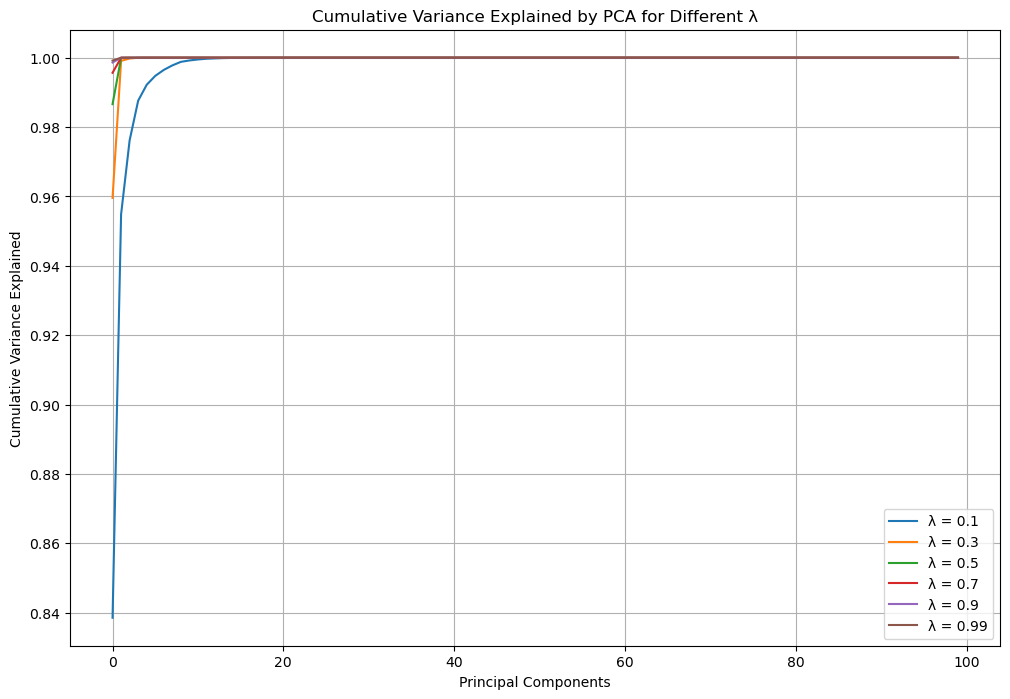

λ = 0.1: maximum eigenvalue = 0.0000, minimum eigenvalue = 0.0000
λ = 0.3: maximum eigenvalue = 0.0005, minimum eigenvalue = -0.0000
λ = 0.5: maximum eigenvalue = 0.0016, minimum eigenvalue = -0.0000
λ = 0.7: maximum eigenvalue = 0.0029, minimum eigenvalue = -0.0000
λ = 0.9: maximum eigenvalue = 0.0044, minimum eigenvalue = -0.0000
λ = 0.99: maximum eigenvalue = 0.0050, minimum eigenvalue = -0.0000


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# 读取数据
data = pd.read_csv('DailyReturn.csv', index_col=0)

# A. 计算指数加权协方差矩阵
def calculate_ewma_covariance(data, lambda_value):
    weights = np.exp(-lambda_value * np.arange(len(data)))[::-1]
    weights /= weights.sum()
    weighted_data = (data - data.mean()) * weights[:, np.newaxis]
    ewma_cov = np.cov(weighted_data.T, aweights=weights)
    return ewma_cov


# B. 改变 λ 并使用 PCA 分析累计方差解释率
lambdas = [0.1, 0.3, 0.5, 0.7, 0.9, 0.99]

plt.figure(figsize=(12, 8))
for lambda_value in lambdas:
    ewma_cov = calculate_ewma_covariance(data, lambda_value)
    pca = PCA()
    pca.fit(ewma_cov)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(cumulative_variance, label=f'λ = {lambda_value}')

plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA for Different λ')
plt.legend()
plt.grid(True)
plt.show()

# C. 分析 λ 对协方差矩阵的影响
def analyze_lambda_effect(lambdas, data):
    for lambda_value in lambdas:
        ewma_cov = calculate_ewma_covariance(data, lambda_value)
        eigenvalues = np.linalg.eigvalsh(ewma_cov)
        print(f'λ = {lambda_value}: maximum eigenvalue = {np.max(eigenvalues):.4f}, minimum eigenvalue = {np.min(eigenvalues):.4f}')

analyze_lambda_effect(lambdas, data)


Frobenius norm differences:
Cholesky method: 0.021325282569965392
PCA method: 5.184857190502035

Simulation execution times (seconds):
Cholesky method: 0.13988947868347168
PCA method: 0.05664825439453125


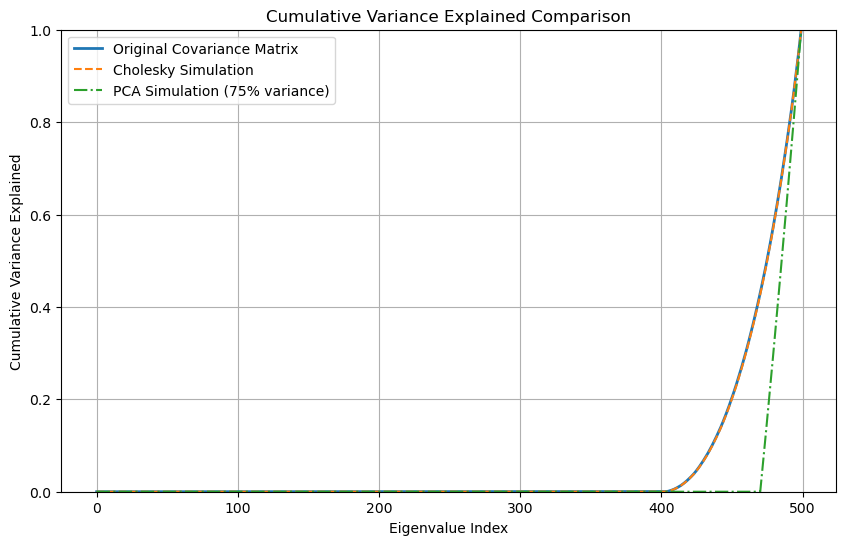

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, cholesky, eigvalsh
from sklearn.decomposition import PCA
import time

# Read the covariance matrix
data = pd.read_csv('problem6.csv', header=0)
cov_matrix = data.values

# Ensure the matrix is symmetric
cov_matrix = (cov_matrix + cov_matrix.T) / 2

# Check for positive definiteness, add jitter if not positive definite
def is_positive_definite(matrix):
    return np.all(np.linalg.eigvals(matrix) > 0)

if not is_positive_definite(cov_matrix):
    cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-6

# A. Multivariate normal simulation using Cholesky decomposition
n_simulations = 10000
start_time_cholesky = time.time()
L = cholesky(cov_matrix)
simulations_cholesky = np.random.randn(n_simulations, cov_matrix.shape[0]) @ L.T
end_time_cholesky = time.time()

# B. Simulation using PCA (75% variance explained)
start_time_pca = time.time()
pca = PCA(n_components=0.75)
pca.fit(data)
simulations_pca = pca.inverse_transform(np.random.randn(n_simulations, pca.n_components_))
end_time_pca = time.time()

# C. Calculate covariance matrices of simulations and Frobenius norm differences
cov_sim_cholesky = np.cov(simulations_cholesky, rowvar=False)
cov_sim_pca = np.cov(simulations_pca, rowvar=False)

frobenius_cholesky = norm(cov_sim_cholesky - cov_matrix, 'fro')
frobenius_pca = norm(cov_sim_pca - cov_matrix, 'fro')

# D. Compare cumulative variance explained by each eigenvalue
eigenvalues_original = eigvalsh(cov_matrix)
eigenvalues_original = np.maximum(eigenvalues_original, 0)  # Ensure non-negative eigenvalues

# Prevent division by zero
total_variance = np.sum(eigenvalues_original)
if total_variance == 0:
    explained_variance_original = np.zeros_like(eigenvalues_original)
else:
    explained_variance_original = np.cumsum(eigenvalues_original) / total_variance

explained_variance_cholesky = np.cumsum(eigvalsh(cov_sim_cholesky)) / np.sum(eigvalsh(cov_sim_cholesky))
explained_variance_pca = np.cumsum(eigvalsh(cov_sim_pca)) / np.sum(eigvalsh(cov_sim_pca))

# E. Compare simulation execution times
cholesky_time = end_time_cholesky - start_time_cholesky
pca_time = end_time_pca - start_time_pca

# F. Discussion of method trade-offs (provided as comments in code)
# Cholesky Method:
# - Advantages: High accuracy, fully retains the structure of the original covariance matrix.
# - Disadvantages: High computational complexity for large matrices, longer execution time.
# PCA Method:
# - Advantages: Faster computation after dimensionality reduction, suitable for large datasets.
# - Disadvantages: Cannot fully retain the original covariance structure, some information loss possible.

# Display results
print("Frobenius norm differences:")
print("Cholesky method:", frobenius_cholesky)
print("PCA method:", frobenius_pca)

print("\nSimulation execution times (seconds):")
print("Cholesky method:", cholesky_time)
print("PCA method:", pca_time)

# Visualize cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_original, label='Original Covariance Matrix', linewidth=2)
plt.plot(explained_variance_cholesky, label='Cholesky Simulation', linestyle='--')
plt.plot(explained_variance_pca, label='PCA Simulation (75% variance)', linestyle='-.')
plt.title('Cumulative Variance Explained Comparison')
plt.xlabel('Eigenvalue Index')
plt.ylabel('Cumulative Variance Explained')
plt.ylim(0, 1)  # Ensure visibility of all lines
plt.legend()
plt.grid()
plt.show()
